# Population & General Demographics in East Africa
***
<img src="https://images.unsplash.com/photo-1560091129-27a0e2af124b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3570&q=80" alt="crowded street" style="width:500px;">

<a id="WebScraping"><h2>Web Scraping</h2></a>
***
<a id="ScraperImport"><h3>Importing Libraries</h3></a>

In [7]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import warnings
warnings.filterwarnings('ignore')

<a id="Setup"><h3>Browser Setup</h3></a>

In [17]:
path="https://data.worldbank.org/"
folder=r"C:\Users\NAJIB\Documents\Data Analysis\EastAfrica\Data"
options=Options();
prefs={"download.default_directory":r"C:\Users\NAJIB\Documents\EastAfrica\Data"}
options.add_experimental_option("prefs",prefs);
driver = webdriver.Chrome(options=options)
driver.get(path)

<a id="downloading"><h3>Downloading Country Specific Data</h3></a>

In [11]:
countries=['Somalia','Kenya','Ethiopia','Sudan', 'South Sudan','Eritrea','Djibouti','Rwanda','Uganda',
           'Burundi','Tanzania','World']

In [27]:
indicators=['Sex ratio at birth (male births per female births)',
'Age dependency ratio (% of working-age population)',
'Age dependency ratio, old (% of working-age population)',
'Age dependency ratio, young (% of working-age population)',
'Population growth (annual %)',
'Population, total',
'Population, female',
'Population, female (% of total population)'
'Population, male',
'Population, male (% of total population)',
'Life expectancy at birth, female (years)',
'Life expectancy at birth, total (years)',
'Life expectancy at birth, male (years)',
'Fertility rate, total (births per woman)',
'Survival to age 65, female (% of cohort)',
'Survival to age 65, male (% of cohort)',
'Population ages 00-04, female (% of female population)',
'Population ages 00-04, male (% of male population)',
'Population ages 0-14, female',
'Population ages 0-14, female (% of female population)',
'Population ages 0-14, male',
'Population ages 0-14, male (% of male population)',
'Population ages 0-14, total',
'Population ages 0-14 (% of total population)',
'Population ages 05-09, female (% of female population)',
'Population ages 05-09, male (% of male population)',
'Population ages 10-14, female (% of female population)',
'Population ages 10-14, male (% of male population)',
'Population ages 15-19, female (% of female population)',
'Population ages 15-19, male (% of male population)',
'Population ages 15-64, female',
'Population ages 15-64, female (% of female population)',
'Population ages 15-64, male',
'Population ages 15-64, male (% of male population)',
'Population ages 15-64, total',
'Population ages 15-64 (% of total population)',
'Population ages 20-24, female (% of female population)',
'Population ages 20-24, male (% of male population)',
'Population ages 25-29, female (% of female population)',
'Population ages 25-29, male (% of male population)',
'Population ages 30-34, female (% of female population)',
'Population ages 30-34, male (% of male population)',
'Population ages 35-39, female (% of female population)',
'Population ages 35-39, male (% of male population)',
'Population ages 40-44, female (% of female population)',
'Population ages 40-44, male (% of male population)',
'Population ages 45-49, female (% of female population)',
'Population ages 45-49, male (% of male population)',
'Population ages 50-54, female (% of female population)',
'Population ages 50-54, male (% of male population)',
'Population ages 55-59, female (% of female population)',
'Population ages 55-59, male (% of male population)',
'Population ages 60-64, female (% of female population)',
'Population ages 60-64, male (% of male population)',
'Population ages 65-69, female (% of female population)',
'Population ages 65-69, male (% of male population)',
'Population ages 65 and above, female',
'Population ages 65 and above, female (% of female population)',
'Population ages 65 and above, male',
'Population ages 65 and above, male (% of male population)',
'Population ages 65 and above, total',
'Population ages 65 and above (% of total population)',
'Population ages 70-74, female (% of female population)',
'Population ages 70-74, male (% of male population)',
'Population ages 75-79, female (% of female population)',
'Population ages 75-79, male (% of male population)',
'Population ages 80 and above, female (% of female population)',
'Population ages 80 and above, male (% of male population)',
]
indicator_codes=['SP.POP.BRTH.MF',
                 'SP.POP.DPND',
                 'SP.POP.DPND.OL',
                 'SP.POP.DPND.YG',
                 'SP.DYN.TFRT.IN',
                 'SP.DYN.LE00.FE.IN',
                 'SP.DYN.LE00.MA.IN',
                 'SP.DYN.LE00.IN',
                 'SP.POP.GROW',
                 'SP.POP.TOTL.FE.IN',
                 'SP.POP.TOTL.MA.IN',
                 'SP.POP.TOTL.MA.ZS',
                 'SP.POP.TOTL.FE.ZS',
                 'SP.DYN.TO65.FE.ZS',
                 'SP.DYN.TO65.MA.ZS']

In [29]:
for code in indicator_codes:
    driver.get(f'https://data.worldbank.org/indicator/{code}')
    country_indicator_download=driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[3]/article/aside/div/div[2]/div/p/a[3]').click()
    home_btn=driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/header/div/a[2]').click()
    time.sleep(2)

In [68]:
import os
final_df = pd.DataFrame(columns=['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value'])
files=list(os.listdir('./Data/'))
for file,indicator in zip(files,indicators):
    file=f'./Data/{file}'
    temp_df=pd.read_excel(file,sheet_name='Data',skiprows=3)
    temp_df=temp_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                 var_name='Year',
                 value_name='Value')
    temp_df['Country ISO3'] = temp_df['Country Code'].str[-3:]
    temp_df = temp_df[['Country Name', 'Country ISO3', 'Year', 'Indicator Name', 'Indicator Code', 'Value']]
    temp_df=temp_df.loc[temp_df['Country Name'].isin(countries)]
    final_df=pd.concat([final_df,temp_df],ignore_index=True)
    # print(temp_df)
    # final_df = final_df.append(temp_df, ignore_index=True)
print(final_df)

      Country Name Country ISO3  Year  \
0          Burundi          BDI  1960   
1         Djibouti          DJI  1960   
2          Eritrea          ERI  1960   
3         Ethiopia          ETH  1960   
4            Kenya          KEN  1960   
...            ...          ...   ...   
11335      Somalia          SOM  2022   
11336  South Sudan          SSD  2022   
11337     Tanzania          TZA  2022   
11338       Uganda          UGA  2022   
11339        World          WLD  2022   

                                 Indicator Name     Indicator Code      Value  
0      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  44.451000  
1      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  45.281000  
2      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  39.649000  
3      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  42.676000  
4      Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN  50.263000  
...                        

<a id="ColumnExtraction"><h3>Extracting Specific Columns</h3></a>

In [70]:
final_df.to_csv('east_africa_pops_data.csv', index=False, header=True)
final_df.tail(5)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
11335,Somalia,SOM,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.134601
11336,South Sudan,SSD,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.523108
11337,Tanzania,TZA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.422968
11338,Uganda,UGA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.527064
11339,World,WLD,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.264885


<a id="EDA"><h2>Exploratory Data Analysis</h2></a>
***
<a id="structure"><h3>Checking Data Structure</h3></a>

In [71]:
df=pd.read_csv('east_africa_pops_data.csv')
df.rename(columns={'Country Name':'Country'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11340 entries, 0 to 11339
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         11340 non-null  object 
 1   Country ISO3    11340 non-null  object 
 2   Year            11340 non-null  int64  
 3   Indicator Name  11340 non-null  object 
 4   Indicator Code  11340 non-null  object 
 5   Value           11244 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 531.7+ KB


In [72]:
print(df.shape)
df.tail(3)

(11340, 6)


,Country,Country ISO3,Year,Indicator Name,Indicator Code,Value
11337,Tanzania,TZA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.422968
11338,Uganda,UGA,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,49.527064
11339,World,WLD,2022,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,50.264885


In [73]:
# visualization
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

Text(0.5, 1.0, 'Distribution of Missing Values')

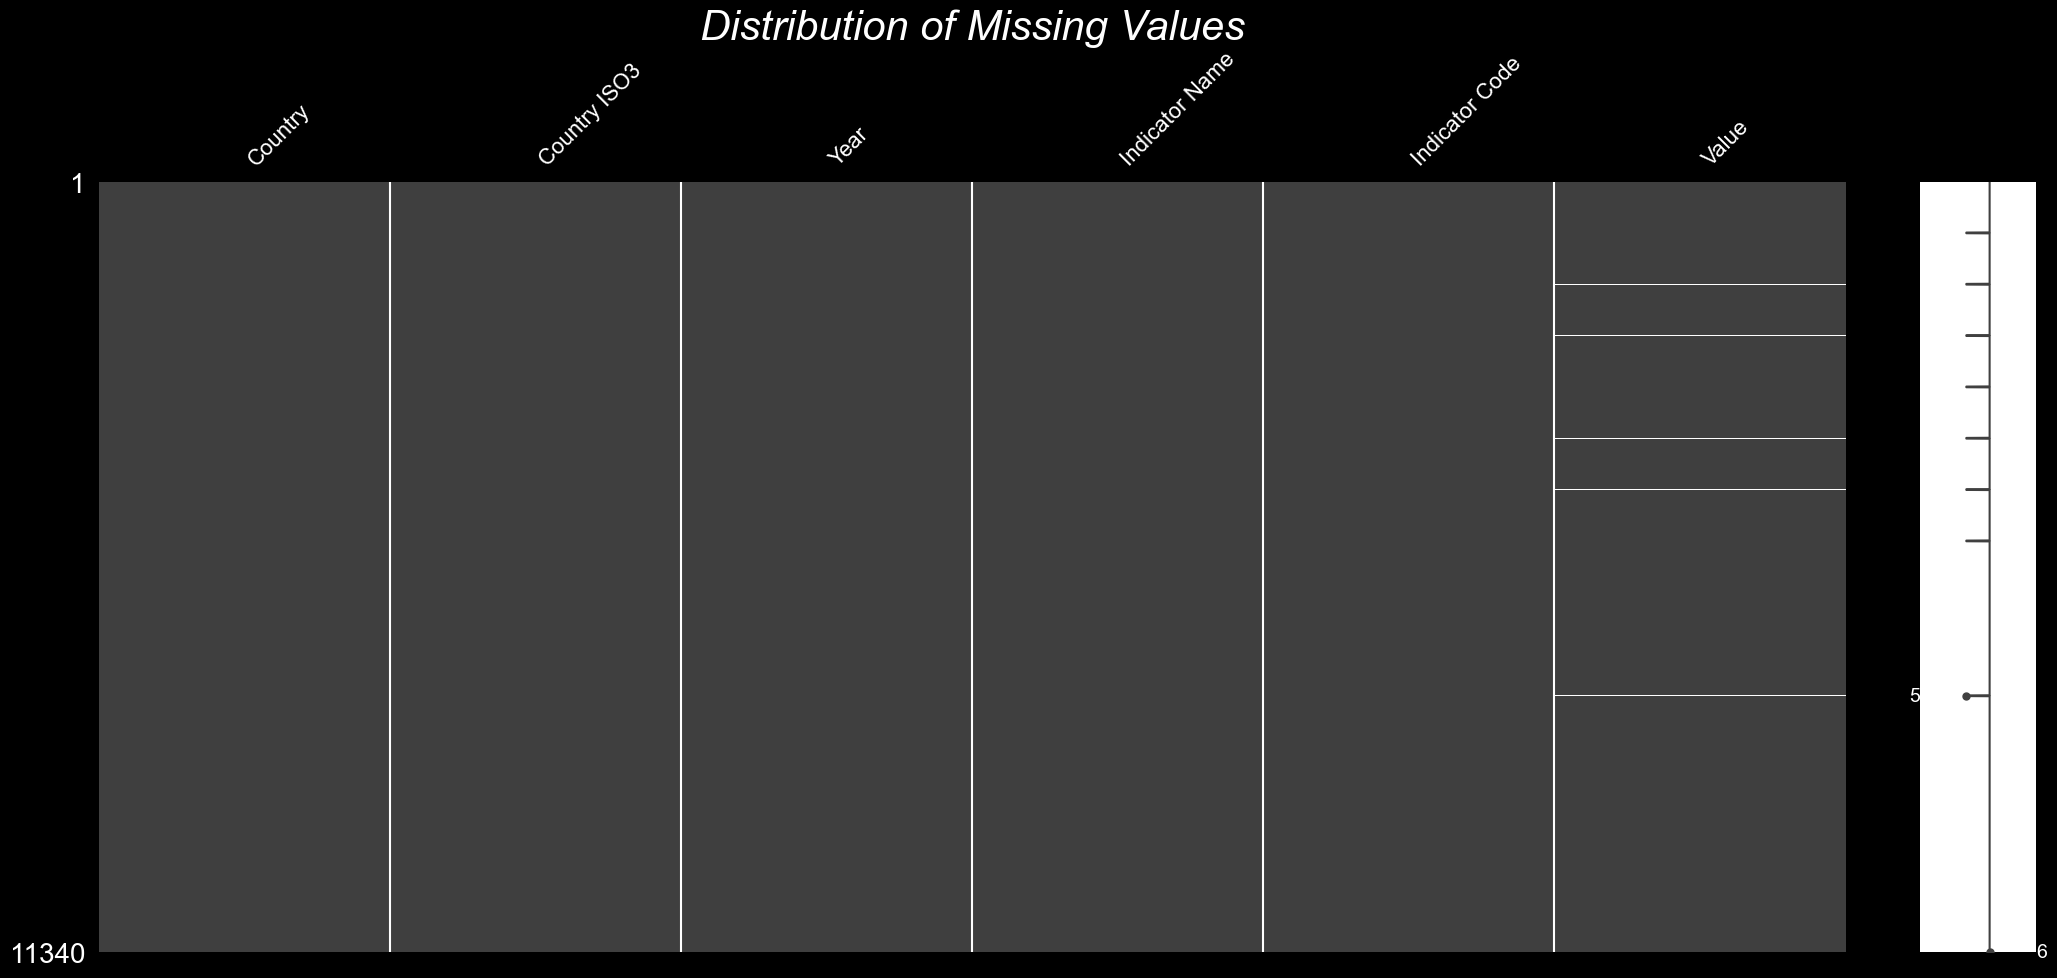

In [74]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

<a id="indicatorspecific"><h3>Creating Indicator specific data frame</h3></a>

In [21]:
def create_separate_frames(indicator):
    temp_df=df.loc[df['Indicator Name']==indicator]
    temp_df=temp_df.filter([f'Country','Year','{indicator}','Value'],axis=1)
#     print(temp_df)
    return temp_df

In [75]:
df=df.filter([f'Country','Year', 'Indicator Name','Value'])
df=df.pivot_table(index=['Country','Year'],columns='Indicator Name', values='Value').reset_index().rename_axis(None, axis=1)
df

,Country,Year,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)",Sex ratio at birth (male births per female births),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
0,Burundi,1960,92.290470,6.110580,86.179890,7.003000,44.451000,41.533000,43.024000,NaN,1.419148e+06,51.668737,1.327479e+06,48.331227,1.025000,37.848041,32.248556
1,Burundi,1961,92.420498,6.128134,86.292363,7.023000,44.631000,41.804000,43.252000,2.493352,1.453599e+06,51.619796,1.362374e+06,48.380240,1.025000,38.062682,32.557873
2,Burundi,1962,92.665829,6.159252,86.506577,7.038000,44.713000,42.102000,43.441000,2.504826,1.489006e+06,51.569129,1.398392e+06,48.430871,1.025000,38.045239,32.959218
3,Burundi,1963,93.544139,6.225037,87.319102,7.067000,45.009000,42.358000,43.718000,2.081634,1.519025e+06,51.524982,1.429107e+06,48.474984,1.025000,38.428793,33.257476
4,Burundi,1964,93.604189,6.254113,87.350076,7.090000,45.338000,42.543000,43.974000,2.845300,1.561243e+06,51.471456,1.471978e+06,48.528544,1.025000,38.879601,33.415269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,World,2018,55.235506,13.801911,40.121543,2.397340,75.272091,70.432414,72.784090,1.102580,3.806732e+09,49.684718,3.855045e+09,50.315282,1.063470,81.706657,73.068320
752,World,2019,55.322257,14.168339,39.892567,2.360559,75.470008,70.623612,72.979716,1.055964,3.847484e+09,49.691878,3.895198e+09,50.308122,1.062069,81.939131,73.344609
753,World,2020,55.354568,14.527944,39.612737,2.299626,74.857303,69.799705,72.243822,1.011039,3.887425e+09,49.705196,3.933538e+09,50.294804,1.059484,80.771268,71.669319
754,World,2021,55.289710,14.820548,39.291893,2.273191,73.947975,68.886412,71.327391,0.859197,3.922150e+09,49.721975,3.966012e+09,50.278025,1.057931,79.029690,69.533117


In [102]:
# Separate 'World' data and calculate mean for East African Countries
world_data = df[df['Country'] == 'World'].round(2)
east_africa_countries_data = df[df['Country'] != 'World']
world_data.columns = [f"{col} (World)" if col != 'Year' else col for col in world_data.columns]
world_data

,Country (World),Year,Age dependency ratio (% of working-age population) (World),"Age dependency ratio, old (% of working-age population) (World)","Age dependency ratio, young (% of working-age population) (World)","Fertility rate, total (births per woman) (World)","Life expectancy at birth, female (years) (World)","Life expectancy at birth, male (years) (World)","Life expectancy at birth, total (years) (World)",Population growth (annual %) (World),"Population, female (World)","Population, female (% of total population) (World)","Population, male (World)","Population, male (% of total population) (World)",Sex ratio at birth (male births per female births) (World),"Survival to age 65, female (% of cohort) (World)","Survival to age 65, male (% of cohort) (World)"
693,World,1960,74.56,8.72,64.86,4.70,52.95,49.03,50.89,NaN,1.516615e+09,50.03,1.514860e+09,49.97,1.05,51.20,41.84
694,World,1961,74.85,8.77,65.10,4.58,54.95,50.94,52.85,1.35,1.537113e+09,50.03,1.535309e+09,49.97,1.05,53.54,43.94
695,World,1962,75.25,8.82,65.40,5.04,57.36,53.24,55.21,1.77,1.564171e+09,50.02,1.562679e+09,49.98,1.05,56.65,46.76
696,World,1963,76.02,8.88,66.03,5.32,57.71,53.56,55.54,2.13,1.597124e+09,50.01,1.596305e+09,49.99,1.05,57.18,47.29
697,World,1964,76.68,8.95,66.56,5.14,58.22,54.03,56.03,2.10,1.630295e+09,50.00,1.630147e+09,50.00,1.05,57.93,48.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,World,2018,55.24,13.80,40.12,2.40,75.27,70.43,72.78,1.10,3.806732e+09,49.68,3.855045e+09,50.32,1.06,81.71,73.07
752,World,2019,55.32,14.17,39.89,2.36,75.47,70.62,72.98,1.06,3.847484e+09,49.69,3.895198e+09,50.31,1.06,81.94,73.34
753,World,2020,55.35,14.53,39.61,2.30,74.86,69.80,72.24,1.01,3.887425e+09,49.71,3.933538e+09,50.29,1.06,80.77,71.67
754,World,2021,55.29,14.82,39.29,2.27,73.95,68.89,71.33,0.86,3.922150e+09,49.72,3.966012e+09,50.28,1.06,79.03,69.53


In [76]:
# Drop the 'Country' column and calculate summary statistics
summary_df = df.drop(columns=['Country']).describe().transpose()

# Rename the columns for better clarity
summary_df.rename(columns={'mean': 'Average', 'min': 'Minimum', 'max': 'Maximum'}, inplace=False)

# Transpose the summary DataFrame to have statistics as rows
summary_df = summary_df.transpose()

# Display the summary DataFrame
print(summary_df)

              Year  Age dependency ratio (% of working-age population)  \
count   756.000000                                         756.000000    
mean   1991.000000                                          90.846350    
std      18.196281                                          12.879232    
min    1960.000000                                          53.676742    
25%    1975.000000                                          84.716289    
50%    1991.000000                                          92.113565    
75%    2007.000000                                          99.116734    
max    2022.000000                                         118.871546    

       Age dependency ratio, old (% of working-age population)  \
count                                         756.000000         
mean                                            5.701319         
std                                             1.732300         
min                                             3.089473         
25%

In [157]:
world_male_life_expectancy=pd.read_csv('./Data/Life_Expectancy_Male.csv',skiprows=4)
world_male_life_expectancy=world_male_life_expectancy.loc[world_male_life_expectancy['Country Name']=='World'].iloc[:,4:].transpose().round(2)
world_male_life_expectancy=world_male_life_expectancy.drop(world_male_life_expectancy.tail(1).index,inplace=False).reset_index(drop=True)
world_male_life_expectancy
world_female_life_expectancy=pd.read_csv('./Data/Life_Expectancy_Female.csv',skiprows=4)
world_female_life_expectancy=world_female_life_expectancy.loc[world_female_life_expectancy['Country Name']=='World'].iloc[:,4:].transpose().round(2)
world_female_life_expectancy=world_female_life_expectancy.drop(world_female_life_expectancy.tail(1).index,inplace=False).reset_index(drop=True)
world_female_life_expectancy.rename(columns={259:'Average Female Life Expectancy Worldwide (Years)'},inplace=True)
world_male_life_expectancy.rename(columns={259:'Average Male Life Expectancy Worldwide (Years)'},inplace=True)
world_male_life_expectancy

,Average Male Life Expectancy Worldwide (Years)
0,49.03
1,50.94
2,53.24
3,53.56
4,54.03
...,...
57,70.17
58,70.43
59,70.62
60,69.80


In [121]:
def create_line_chart(df_grouped,title,columns):
    # create a trace for each variable
    traces=[]
    variables=columns
    colors = ['#C10000', '#d39b81','#0476D9','#75A3BF']

    for variable, color in zip(variables, colors):
        trace = go.Scatter(
            x=df_grouped['Year'],
            y=df_grouped[variable],
            mode='lines+markers',
            name=variable,
            line=dict(color=color, width=2),
        )
        traces.append(trace)
    

    # Create the layout
    layout = go.Layout(
        autosize=False,
        width=600,
        height=400,
        title=title,
        xaxis=dict(title='Year', showgrid=False),
        yaxis=dict(title='Age', showgrid=True),
        plot_bgcolor='#fbf1e6',
        paper_bgcolor='#fbf1e6',
        font=dict(family='Poppins', size=12, color='black'),
        legend=dict(x=0.05, y=0.5, bgcolor='rgba(255, 255, 255, 0.8)', bordercolor='rgba(0, 0, 0, 0.2)', borderwidth=1),
        margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad = 4
    )
    )

    # Create the figure and add the traces
    fig = go.Figure(data=traces, layout=layout)

    # Apply Style
    fig.update_layout(
        font=dict(family='Poppins'),
        title_font=dict(size=24, color='#000000'),
        legend_font=dict(size=12),
        legend_itemclick='toggle',
        legend_itemdoubleclick='toggleothers',
        legend_traceorder='normal',
        legend_tracegroupgap=10,
        legend_bordercolor='#000000',
        legend_borderwidth=1,
        legend_bgcolor='#ffffff',
        legend_xanchor='left',
        legend_yanchor='top',
        legend_x=0.02,
        legend_y=1.12,
        margin=dict(l=50, r=50, t=80, b=50),
    )
    fig.update_yaxes(gridcolor='#c9c1b8') 
    # Display the plot
    fig.show()

In [122]:

# Extract the required columns
columns = ['Year','Life expectancy at birth, female (years)', 'Life expectancy at birth, male (years)']
df_selected = df[columns]
# Group the data by year and calculate the mean values
df_grouped = df_selected.groupby('Year').mean().round(2).reset_index()
# Extract Required Columns from World Data
cols=['Life expectancy at birth, female (years) (World)','Life expectancy at birth, male (years) (World)']
df_world_columns=world_data[cols]
# print(df_world_columns)
# Mege with Worldwide Data
merged_df = pd.merge(df_grouped, world_data[['Year', 'Life expectancy at birth, female (years) (World)', 'Life expectancy at birth, male (years) (World)']],on='Year', how='outer')

# Rename columns to match the desired format
merged_df.rename(columns={
    'Life expectancy at birth, female (years)': 'Average Female Life Expectancy (East Africa)',
    'Life expectancy at birth, male (years)': 'Average Male Life Expectancy (East Africa)',
    'Life expectancy at birth, female (years) (World)': 'Average Female Life Expectancy (World)',
    'Life expectancy at birth, male (years) (World)': 'Average Male Life Expectancy (World)'
}, inplace=True)
columns=merged_df.columns
create_line_chart(merged_df,'Average Life Expectancy in East Africa',columns[1:])